# **Proyecto Primera Parte: Exploracion de los datos**
Maria Paula Alba Gomez <br>
Diseño de Software Inteligente <br>
Maestria en Inteligencia Artificial<br>



Conjunto de datos seleccionado: [Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?select=StudentsPerformance.csv)

Para este proyecto se pretende realizar un modelo de clasificación que predice si se pasa un examen o no de acuerdo a ciertas caracteristicas como son el genero,  el tipo de comida que se le da al estudiante, el nivel de preparación para el examen, el nivel de educación de los
padres y a partir del promedio de las notas obtenias en matematicas, lectura y escritura.

En esta primera parte se presenta la exploración de los datos

# Importación de Librerias

Se importan las librerias necesarias para la ejecion del proyecto.

In [55]:
import sys
from packaging import version

import sklearn

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

Se requiere Python 3.7 o superior y  Scikit-Learn ≥ 1.0.1:

In [2]:
assert sys.version_info >= (3, 7)
print(version.parse(sklearn.__version__))

1.0.2


Código extra - código para guardar las figuras como PNG de alta resolución para el libro (Tomado del colab de ejemplo presentado en la clase)

In [3]:
IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Cargue de datos

El conjunto de datos [Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?select=StudentsPerformance.csv) fue descargado y subido a la cuenta propia de [GitHub](https://github.com/mariap-alba/DSI).



In [4]:
url = "https://raw.githubusercontent.com/mariap-alba/DSI/master/dataset/StudentsPerformance.csv"
dataset = pd.read_csv(url)

# Visualización de los datos

Se visualiza las primeras 5 lineas del dataset con el metodo head()

In [5]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


El dataset cuenta con 8 atributos: gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score y writing score.

Se realiza una copia del dataset con el metodo copy() para no modificar el dataset original.

In [6]:
students = dataset.copy()

Se obtiene el promedio de las caractericticas math score, reading score y writing score por cada instancia.

In [7]:
mean_score= []
for i in range(len(dataset)):
  suma = dataset['math score'][i] + dataset['reading score'][i] + dataset['writing score'][i]
  mean = suma/3
  mean_score.append(round(mean,1))

print(mean_score)

[72.7, 82.3, 92.7, 49.3, 76.3, 77.3, 91.7, 40.7, 65.0, 49.3, 54.7, 45.0, 73.0, 73.3, 53.7, 74.0, 87.7, 26.0, 44.7, 57.7, 66.0, 70.0, 50.3, 71.7, 75.0, 73.0, 59.3, 70.3, 68.3, 69.0, 72.3, 63.0, 64.3, 40.0, 88.7, 80.3, 79.3, 57.7, 84.3, 56.7, 56.7, 66.3, 58.7, 63.3, 53.3, 58.7, 60.7, 71.0, 69.0, 82.7, 52.0, 71.3, 46.3, 80.3, 80.7, 39.0, 84.3, 52.0, 58.3, 9.0, 75.0, 37.3, 59.3, 73.3, 58.7, 64.0, 39.7, 68.7, 58.3, 53.3, 64.7, 60.3, 46.7, 58.0, 46.3, 41.0, 26.0, 79.7, 69.0, 66.0, 48.7, 46.3, 50.3, 66.3, 38.3, 78.3, 82.3, 72.0, 65.0, 80.3, 70.3, 32.3, 73.7, 46.0, 85.7, 80.3, 64.3, 68.3, 62.3, 64.7, 71.0, 72.0, 88.3, 50.3, 91.3, 65.7, 95.7, 64.3, 66.0, 68.7, 88.0, 55.3, 51.3, 54.3, 99.7, 78.3, 80.7, 79.7, 58.3, 63.0, 86.7, 90.7, 91.3, 58.7, 78.7, 89.3, 69.0, 72.0, 79.3, 50.3, 85.0, 43.3, 77.0, 80.0, 76.0, 53.7, 48.7, 60.3, 64.0, 67.0, 73.0, 61.7, 50.3, 49.0, 79.7, 31.3, 82.3, 69.0, 74.7, 97.7, 66.0, 70.7, 65.0, 50.0, 63.3, 82.3, 72.7, 60.0, 78.0, 64.0, 78.0, 82.7, 51.3, 51.3, 88.0, 98.7, 51.7

Se agrega al dataset una nueva caracteristica llamada mean_score el cual contiene el promedio de las notas obtenidas en matematicas, lectura y escritura de cada uno de los estudiantes.

In [59]:
students['mean_score'] = mean_score
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_score,pass_test
0,female,group B,bachelor's degree,standard,none,72,72,74,72.7,1
1,female,group C,some college,standard,completed,69,90,88,82.3,1
2,female,group B,master's degree,standard,none,90,95,93,92.7,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.3,0
4,male,group C,some college,standard,none,76,78,75,76.3,1


Si el estudiante supera la nota de 65 en el prmedio de las tres materias se le asigna 1 que quiere decir que aprueba el examen, en caso contrario se le asigna 0

In [60]:
pass_test= []
for i in range(len(students)):
  if students['mean_score'][i] >= 65:
    pass_test.append(1)
  else:
    pass_test.append(0)

print(pass_test)

[1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 

Se agraga la nueva columna llamada pass_test que contiene 0 (no aprueba) y 1(aprueba) 

In [61]:
students['pass_test'] = pass_test
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_score,pass_test
0,female,group B,bachelor's degree,standard,none,72,72,74,72.7,1
1,female,group C,some college,standard,completed,69,90,88,82.3,1
2,female,group B,master's degree,standard,none,90,95,93,92.7,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.3,0
4,male,group C,some college,standard,none,76,78,75,76.3,1


Mediante el método info() se puede obtener una descripción rápida de los datos, como es el número total de filas, el tipo de cada atributo y el número de valores no nulos.

In [11]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   mean_score                   1000 non-null   float64
 9   pass_test                    1000 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 78.2+ KB


En el conjunto de datos se encuentra 1000 instancias. Se observa que no se encuentran datos nulos.

Los 5 primeros atributos observamos que son datos categoricos y los 5 ultimos atributos son datos númericos.

Con metodo describe() se puede observar el resumen de los datos numericos.

In [12]:
students.describe()

,math score,reading score,writing score,mean_score,pass_test
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.769800,0.601000
std,15.16308,14.600192,15.195657,14.257197,0.489938
min,0.00000,17.000000,10.000000,9.000000,0.000000
25%,57.00000,59.000000,57.750000,58.300000,0.000000
50%,66.00000,70.000000,69.000000,68.300000,1.000000
75%,77.00000,79.000000,79.000000,77.700000,1.000000
max,100.00000,100.000000,100.000000,100.000000,1.000000


Con ayuda de los histogramas se viasualizas las instancias en el eje vertical y lo valores en el eje horizontal. Unicamnete se observal los datos numericos.

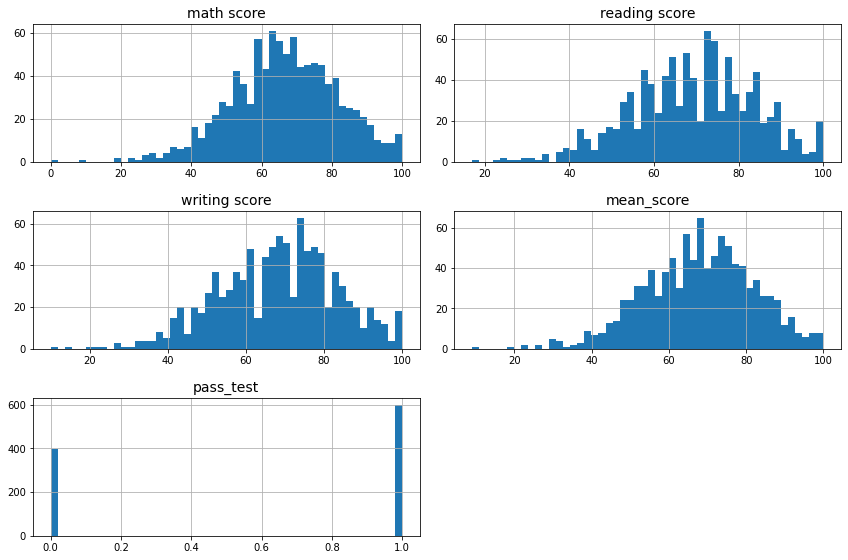

In [13]:
# código extra - las siguientes 5 líneas definen los tamaños de fuente por defecto
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

students.hist(bins=50, figsize=(12, 8))
save_fig("Histogramas")  # extra code
plt.show()

# Matriz de Correlación

La Matriz de Correlación muestra la relación existente entre las caractericticas númericas.

In [19]:
corr_matrix = students.corr()

In [20]:
corr_matrix["pass_test"].sort_values(ascending=False)

pass_test        1.000000
mean_score       0.799173
writing score    0.780311
reading score    0.779514
math score       0.721887
Name: pass_test, dtype: float64

El siguiente mapa de calor muestra la matriz de correlación donde se observa que hay una relación directamente proporcional entre las variables y la variable a predecir(pass_test) ya que el valor se acerca a 1.

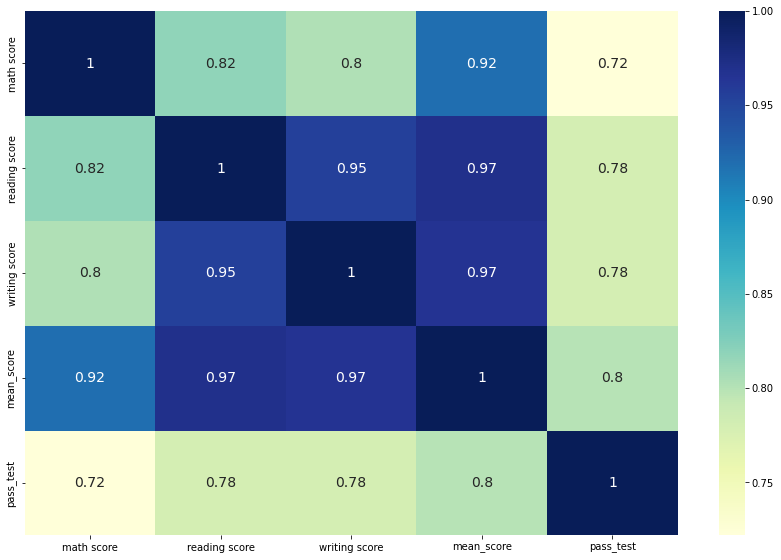

In [23]:
fig, ax = plt.subplots(figsize=(12,8)) 
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', ax=ax)
save_fig("Matriz de Correlacion")  # extra code

Para comprobar la correlación entre los atributos, se utiliza la función scatter_matrix(), que compara entre si cada uno de las datos numéricos.

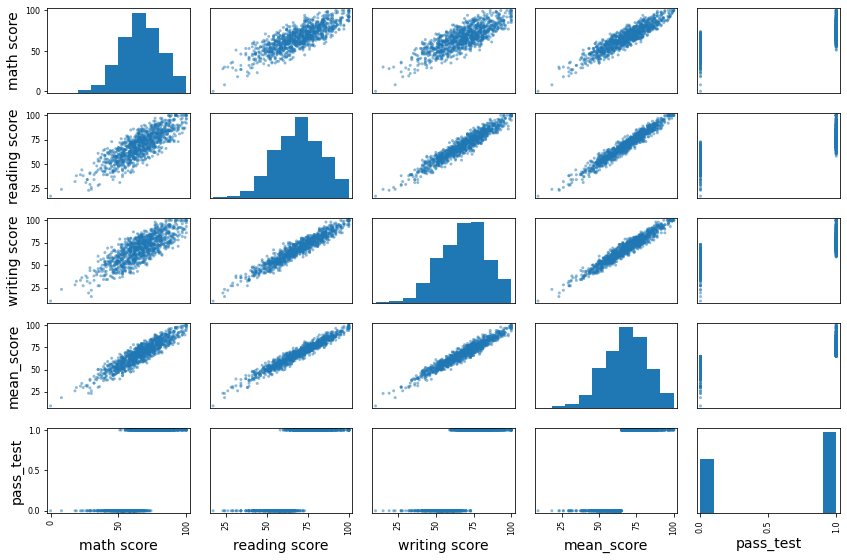

In [27]:
from pandas.plotting import scatter_matrix

scatter_matrix(students, figsize=(12, 8))
save_fig("Scatter Matrix")  # extra code
plt.show()

# División de datos train y test

Se divide la variable a predecir del resto de los datos

In [14]:
X_data = students.drop('pass_test', axis=1)
y_data = students['pass_test']

In [15]:
X_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.7
1,female,group C,some college,standard,completed,69,90,88,82.3
2,female,group B,master's degree,standard,none,90,95,93,92.7
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.3
4,male,group C,some college,standard,none,76,78,75,76.3
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.0
996,male,group C,high school,free/reduced,none,62,55,55,57.3
997,female,group C,high school,free/reduced,completed,59,71,65,65.0
998,female,group D,some college,standard,completed,68,78,77,74.3


Mediante train_test_split se dividen los datos en entrenamiento (70%) y prueba(30%) con los datos estrateficados.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42 , stratify=y_data)

Como se observa en los dos histogramas los datos quedaron correctamente estratificados en la variable a predecir.

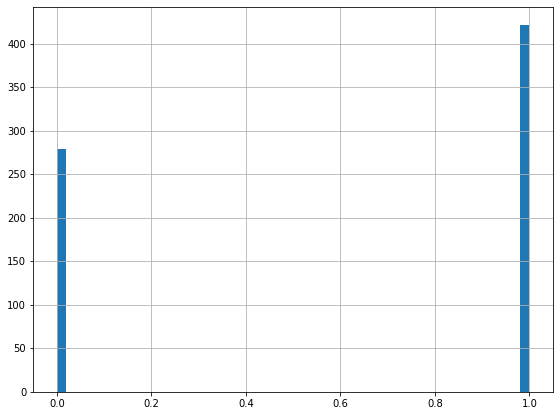

In [24]:
y_train.hist(bins=50, figsize=(8,6))
save_fig("Histograma Y_train")  # extra code
plt.show()

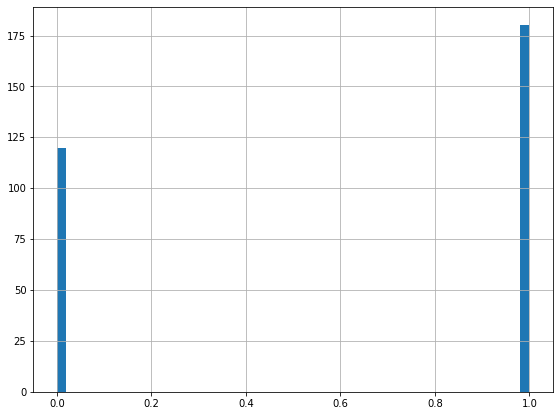

In [25]:
y_test.hist(bins=50, figsize=(8, 6))
save_fig("Histograma Y_test")  # extra code
plt.show()

# Preparacion de los datos

## Limpieza de datos

Como se observo con metodo info() el dataset no cuenta con datos, se verifica la información mediante la función matrix de Missingo el cual permite visualizar donde se encuentran los datos nulos en caso de que exitan. 

Para este caso se comprueba que todos las caractericticas cuentan con 1000 instancias en total.

<ipython-input-3-f3badef8a755>:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


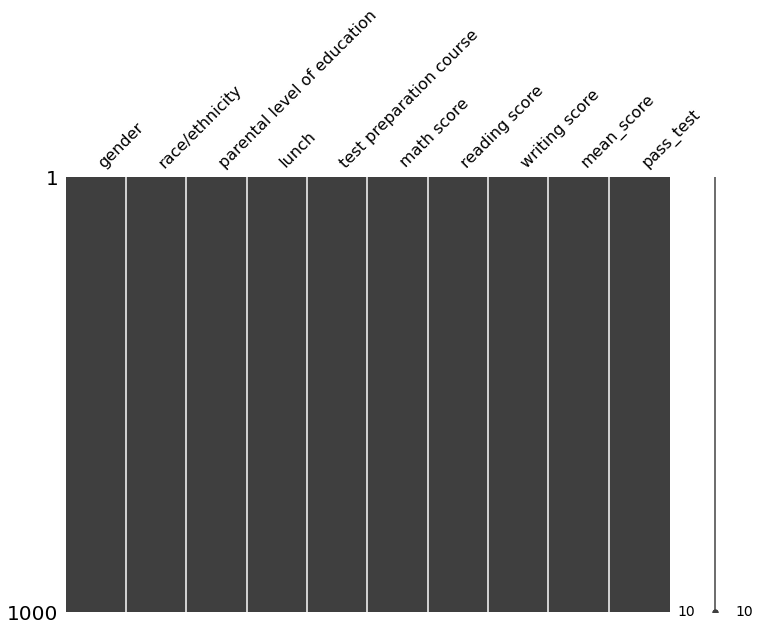

In [63]:
import missingno as msno
msno.matrix(students, figsize=(12,8))
save_fig("Visualizacion datos faltantes")  # extra code

## Tratamiento de datos categoricos

Para convertir los datos categoricos en datos númericos se utiliza la libreria OneHotEncoder que asigna el valor de 1 a la categoria presente y cero a las demas.

In [39]:
X_data_categoricos = ['gender', 'race/ethnicity','parental level of education','lunch','test preparation course']
X_data_categoricos

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [41]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder()
X_data_onehot = onehot.fit_transform(X_data[X_data_categoricos])

In [42]:
X_data_onehot.toarray()

array([[1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [43]:
onehot.categories_

[array(['female', 'male'], dtype=object),
 array(['group A', 'group B', 'group C', 'group D', 'group E'],
       dtype=object),
 array(["associate's degree", "bachelor's degree", 'high school',
        "master's degree", 'some college', 'some high school'],
       dtype=object),
 array(['free/reduced', 'standard'], dtype=object),
 array(['completed', 'none'], dtype=object)]

## Escalado de datos numerico

Para normalizar los datos númericos se utiliza la herramienta StandardScaler el cual obtiene el valor medio y lo divide por la desviación estandar.

In [44]:
X_data_num = ['math score','reading score','writing score'] 
X_data_num

['math score', 'reading score', 'writing score']

In [45]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_data_scaled = std_scaler.fit_transform(X_data[X_data_num])

In [46]:
X_data_scaled

array([[ 0.39002351,  0.19399858,  0.39149181],
       [ 0.19207553,  1.42747598,  1.31326868],
       [ 1.57771141,  1.77010859,  1.64247471],
       ...,
       [-0.46775108,  0.12547206, -0.20107904],
       [ 0.12609287,  0.60515772,  0.58901542],
       [ 0.71993682,  1.15336989,  1.18158627]])

# Pipeline

Los Pipiline permiten realizar el procesdo de limpieza, normalizacion y transformación de datos categoricos de una forma más rapida sin ejecutar tantas lineas de codigo.

In [49]:
from sklearn.pipeline import Pipeline

## Pipeline datos numericos

Se crea un pipeline para lod datos numericos que permite normalizar los datos con StandarScaler

In [50]:
num_pipeline = Pipeline([("standardize", StandardScaler())])
X_data_pipeline_num = num_pipeline.fit_transform(X_data[X_data_num])

In [51]:
X_data_pipeline_num

array([[ 0.39002351,  0.19399858,  0.39149181],
       [ 0.19207553,  1.42747598,  1.31326868],
       [ 1.57771141,  1.77010859,  1.64247471],
       ...,
       [-0.46775108,  0.12547206, -0.20107904],
       [ 0.12609287,  0.60515772,  0.58901542],
       [ 0.71993682,  1.15336989,  1.18158627]])

## Pipeline datos categoricos

Se crea un pipeline para los datos categoricos que permite la transformación de categoricos a numericos mediante OneHotEncoder.

In [52]:
cat_pipeline = Pipeline([("categoricos", OneHotEncoder())])
X_data_pipeline_cat = cat_pipeline.fit_transform(X_data[X_data_categoricos])

In [54]:
X_data_pipeline_cat.toarray()

array([[1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

# Conclusiones



*   La visualización de datos permite deteminar la variable a predecir e identificar las caracteristicas que tienen más relación con la variable a predecir.
*   La estrateficación ayuda a que los datos esten distribuidos equitativamente en los datos de entrenamiento y los datos de prueba.
*   Los Pipeline permite realizar multiples tareas para los datos categoricos y los datos numericos sin tener que ejecutar varias lineas de codigo.
*   La variable a predecir 'pass_test' es un problema de clasificacion ya que los resultados son 0 para cuando no se apruba el examen y 1 para cuando se aprueba el examen.



